In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

## Loading the data
Here I load the tracks dumped from athena using uproot. I'll keep the samples separate for testing later on.

In [74]:
indir = "/data/newhouse/LRT/batch/master/training/"
VH4b_samples = glob.glob(indir+'VH4b/*/*/track_info_InDetSummaryDumpAlg_R3LargeD0.root')
RPVLF_samples = glob.glob(indir+'RPVLF/*/*/track_info_InDetSummaryDumpAlg_R3LargeD0.root')
HNL_samples = glob.glob(indir+'HNL/*/*/track_info_InDetSummaryDumpAlg_R3LargeD0.root')

df = pd.DataFrame()

save_columns = [
    # Features used in traditional scoring function
    "numberOfPixelHoles", # output tracks only
    "numberOfSCTHoles", # output tracks only
    "numberOfSCTDoubleHoles", # output tracks only
    "numberOfContribPixelLayers",
    "numberOfBLayerHits",
    "numberOfGangedFlaggedFakes",
    # "numberOfTRTHits",
    # "numberOfTRTOutliers",
    "numberOfPixelHits",
    "numberOfSCTHits",
    # "Sihits",
    "standardDeviationOfChi2OS",
    "track_pt",
    "chiSquared",
    "numberDoF",
    
    # New features not used in traditional score, these may help.
    "numberOfBLayerSplitHits",
    "numberOfInnermostLayerSplitHits",
    "numberOfInnermostPixelLayerHits",
    "numberOfNextToInnermostLayerSplitHits",
    "numberOfNextToInnermostPixelLayerHits",
    "numberOfPixelSplitHits",
    "numberOfPixelOutliers",
    "numberOfSCTOutliers",
    "numberOfPixelSpoiltHits",
    "numberOfSCTSpoiltHits",
    "numberOfGangedPixels",
    "numberOfOutliersOnTrack",
    
    "track_eta",
    "d0",
    "z0",
    "phi0",
    "theta",
    "qOverP",
    # For training and evaluation
    "score",
    "linkValid",
    "truthProbability",  
    "truthBarcode",
]

for signal, sample_list in zip(['VH4b', 'RPVLF', 'HNL'], [VH4b_samples, RPVLF_samples, HNL_samples]):
    print('\n'+signal)
    for sample in sample_list:
        try:
            tracks = uproot.open(sample)['tracks']
            print('.', end='')
            tmp_df = tracks.pandas.df(save_columns)
            tmp_df['signal'] = signal
            df = df.append(tmp_df)
        except:
            print(f'Cannot open {sample}')



VH4b
....................................................................................................
RPVLF
........................................
HNL
....................................................................................................

Let's peek at the dataframe to see the features and some of their statistics

In [75]:
df.describe()

,numberOfPixelHoles,numberOfSCTHoles,numberOfSCTDoubleHoles,numberOfContribPixelLayers,numberOfBLayerHits,numberOfGangedFlaggedFakes,numberOfPixelHits,numberOfSCTHits,standardDeviationOfChi2OS,track_pt,chiSquared,numberDoF,numberOfBLayerSplitHits,numberOfInnermostLayerSplitHits,numberOfInnermostPixelLayerHits,numberOfNextToInnermostLayerSplitHits,numberOfNextToInnermostPixelLayerHits,numberOfPixelSplitHits,numberOfPixelOutliers,numberOfSCTOutliers,numberOfPixelSpoiltHits,numberOfSCTSpoiltHits,numberOfGangedPixels,numberOfOutliersOnTrack,track_eta,d0,z0,phi0,theta,qOverP,score,truthProbability,truthBarcode
count,2.101500e+06,2.101500e+06,2101500.0,2.101500e+06,2101500.0,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2101500.0,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06,2.101500e+06
mean,2.404092e-01,3.485734e-01,0.0,9.490868e-01,-1.0,1.949036e-02,9.805786e-01,7.697868e+00,1.263031e+02,3.896937e+04,6.684915e+00,4.659025e+00,-1.0,1.094456e-04,6.431025e-02,1.665477e-04,1.569826e-01,6.490602e-04,2.007804e-02,3.368404e-02,4.895408e-02,1.325477e-01,7.214751e-02,5.376207e-02,7.954561e-03,-2.465435e+00,5.456634e-01,-2.421630e-02,1.566775e+00,1.802571e-05,1.894842e+02,6.636045e-01,4.477003e+04
std,4.273321e-01,4.765187e-01,0.0,8.875948e-01,0.0,1.392730e-01,9.584716e-01,9.595846e-01,4.691058e+03,4.569132e+07,5.018446e+00,1.949173e+00,0.0,1.086274e-02,2.559579e-01,1.323198e-02,3.790397e-01,2.695698e-02,1.425155e-01,1.965545e-01,2.219684e-01,3.741060e-01,2.662266e-01,2.445397e-01,1.320775e+00,8.670509e+01,2.281682e+02,1.815531e+00,9.403520e-01,4.290146e-04,1.774043e+03,2.401811e-01,1.875288e+05
min,0.000000e+00,0.000000e+00,0.0,0.000000e+00,-1.0,0.000000e+00,0.000000e+00,2.000000e+00,-1.000000e+00,1.000001e+03,1.220766e-04,1.000000e+00,-1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.691469e+00,-2.998766e+02,-4.999986e+02,-3.141592e+00,1.348850e-01,-9.998488e-04,6.998228e-05,1.000000e-01,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.0,0.000000e+00,-1.0,0.000000e+00,0.000000e+00,7.000000e+00,5.300000e+01,1.190398e+03,3.018919e+00,3.000000e+00,-1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.112579e+00,-4.809681e+01,-1.575010e+02,-1.594856e+00,6.276566e-01,-2.975890e-04,8.066553e-03,5.000000e-01,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.0,1.000000e+00,-1.0,0.000000e+00,1.000000e+00,8.000000e+00,9.000000e+01,1.524033e+03,5.611562e+00,4.000000e+00,-1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.785011e-03,-4.380698e+00,9.142472e-01,-3.392452e-02,1.565011e+00,3.218601e-05,1.573555e-02,6.666667e-01,0.000000e+00
75%,0.000000e+00,1.000000e+00,0.0,1.000000e+00,-1.0,0.000000e+00,1.000000e+00,8.000000e+00,1.480000e+02,2.521620e+03,9.054062e+00,5.000000e+00,-1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.125304e+00,4.342717e+01,1.589002e+02,1.542726e+00,2.506425e+00,3.316224e-04,6.314733e-02,8.750000e-01,9.530000e+02
max,1.000000e+00,1.000000e+00,0.0,6.000000e+00,-1.0,3.000000e+00,9.000000e+00,1.800000e+01,3.189489e+06,6.623324e+10,9.856221e+01,2.500000e+01,-1.0,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,7.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,7.000000e+00,2.694963e+00,2.982235e+02,4.999996e+02,3.141591e+00,3.006237e+00,9.997356e-04,1.096304e+06,1.000000e+00,8.200041e+06


We need to engineer a few variables that we're interested in using

In [76]:
# John's "geometric variable"
df.rename({'track_eta': 'eta'}, axis='columns', inplace=True)
df['geometric_var'] = abs(np.arctan2(abs(df.d0),df.z0)-2*np.arctan(np.exp(-df.eta)))
# abs values
df['abs_z0'] = abs(df.z0)
df['abs_d0'] = abs(df.d0)
df['abs_eta'] = abs(df.eta)
# silicon hits
df['Sihits'] = df.numberOfPixelHits + df.numberOfSCTHits

First let's take a look at the truth value of these tracks. Here we separate the tracks with a valid truth link into those with a primary particle origin (Geant code < 200000) and those with a secondary origin (Geant code >= 200000).

Text(0.5, 0, 'truthProbability')

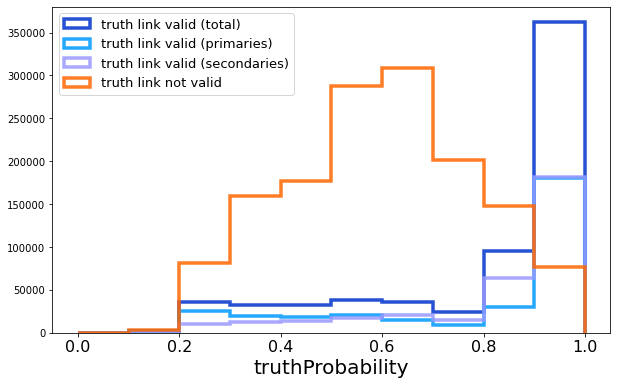

In [80]:
fig, ax = plt.subplots(1, 1,figsize=(10,6))
plot_options = {
    'histtype' : 'step',
    'linewidth' : 3.5, 
    'alpha' : 0.85, 
    'density' : None,
    'bins' : np.linspace(0,1,11)
}
ax.hist(df.query('linkValid==True & truthBarcode>0')['truthProbability'], color='#0033cc', label='truth link valid (total)', **plot_options)
ax.hist(df.query('linkValid==True & truthBarcode<200000')['truthProbability'],  color='#0099ff', label='truth link valid (primaries)', **plot_options)
ax.hist(df.query('linkValid==True & truthBarcode>=200000')['truthProbability'],  color='#9999ff', label='truth link valid (secondaries)', **plot_options)
ax.hist(df.query('linkValid==False ')['truthProbability'], color='#ff6600', label='truth link not valid', **plot_options)
# ax.hist(df.query('linkValid==False | truthProbability<0.5 ')['truthProbability'], label='truth link not valid or prob < 0.5', color='orange', **plot_options)
ax.legend( loc='upper left', fontsize=13)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.set_xlabel('truthProbability', fontsize = 20)

We'll define truth by having a truth-match probability of greater than 0.5, and a valid link to a truth particle. This accounts for secondary tracks from material interactions etc.

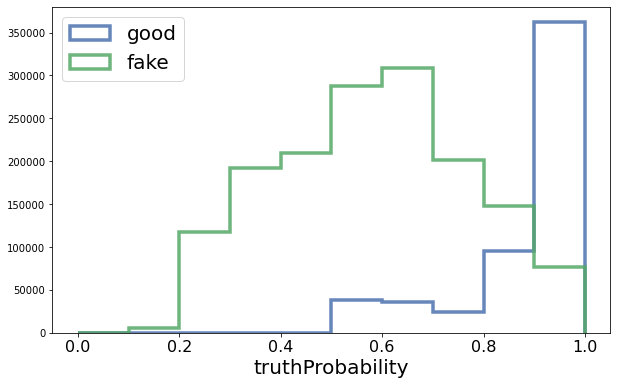

In [81]:
var = 'truthProbability'
stack = False

good_query = 'truthProbability >= 0.5 & linkValid == True'
fake_query = 'truthProbability < 0.5 | linkValid == False'
# Set an 'is_good' column for the full df
df['is_good'] = False
df['is_good'] = (df['truthProbability']>=0.5) & df['linkValid']
# Create slices for convenience
good = df.query(good_query)
fake = df.query(fake_query)


fig, ax = plt.subplots(1, 1,figsize=(10,6))

plot_options = {
    'histtype' : 'step',
    'linewidth' : 3.5, 
    'alpha' : 0.85, 
    'density' : None,
    'bins' : np.linspace(0,1,11)
}

def plot_truth_prob(good, fake):
    fake_vals, bin_edges = np.histogram(fake[var], plot_options['bins'])
    if not stack: fake_vals = None
    good_vals = ax.hist(good[var], edgecolor='#4C72B0', bottom=fake_vals,  **plot_options)
    fake_vals = ax.hist(fake[var], edgecolor='#55A868', **plot_options)
    ax.legend(['good', 'fake'], loc='upper left', fontsize=20)
    ax.set_xlabel(var, fontsize = 20)
    ax.tick_params(axis='x', which='major', labelsize=16)
    return ax

plot_truth_prob(good, fake)

Here we can save the data to pickle for reading later or transferring to a different machine.

In [82]:
if True:
    df.to_pickle('/data/newhouse/LRT/batch/master/training/tracks.pkl')
df = pd.read_pickle('/data/newhouse/LRT/batch/master/training/tracks.pkl')

Now we can make some 2d correlation plots using seaborn's kernel density esimation feature

In [18]:
def plot_kde_2d(x_var, y_var, nentries=5000, xlim=[], ylim=[]):
    joint_axes = []
    sns.set(font_scale=2)
    for df, title in zip([good, fake], ['good', 'fake'] ):
        ax = sns.jointplot(x=x_var, y=y_var, data=df[0:nentries], kind="kde", height=10, color='darkgreen', xlim=xlim, ylim=ylim);
        ax.ax_marg_x.set_title(title)
        joint_axes.append(ax.ax_joint)
    return joint_axes

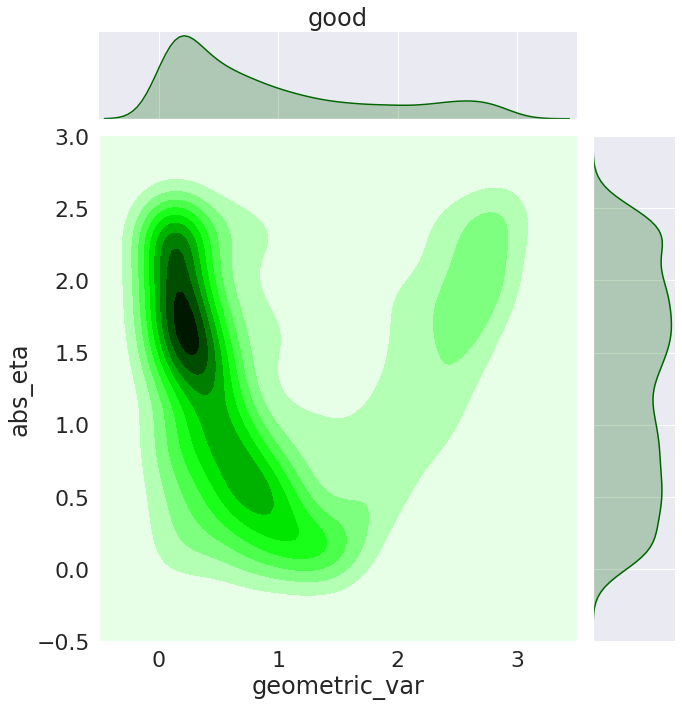

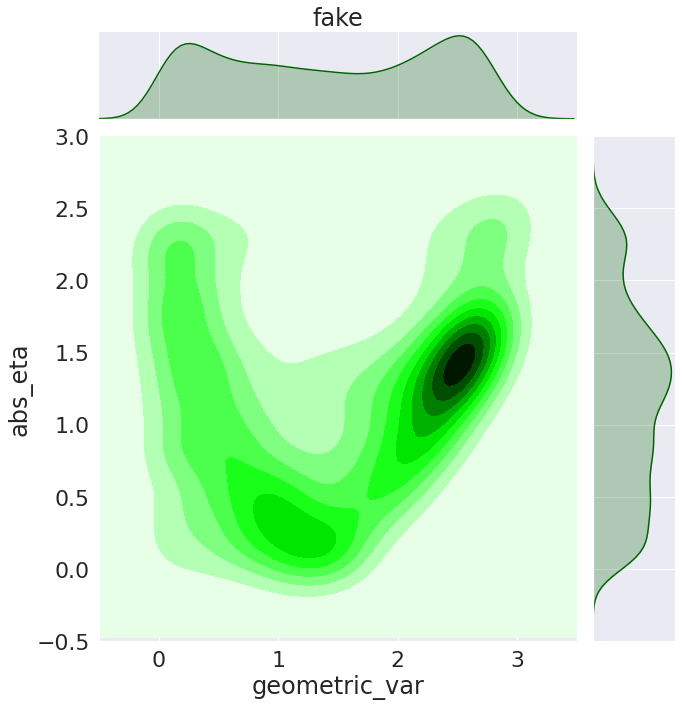

In [19]:
plot_kde_2d('geometric_var', 'abs_eta', nentries=5000, xlim=[-0.5,3.5], ylim=[-.5,3])

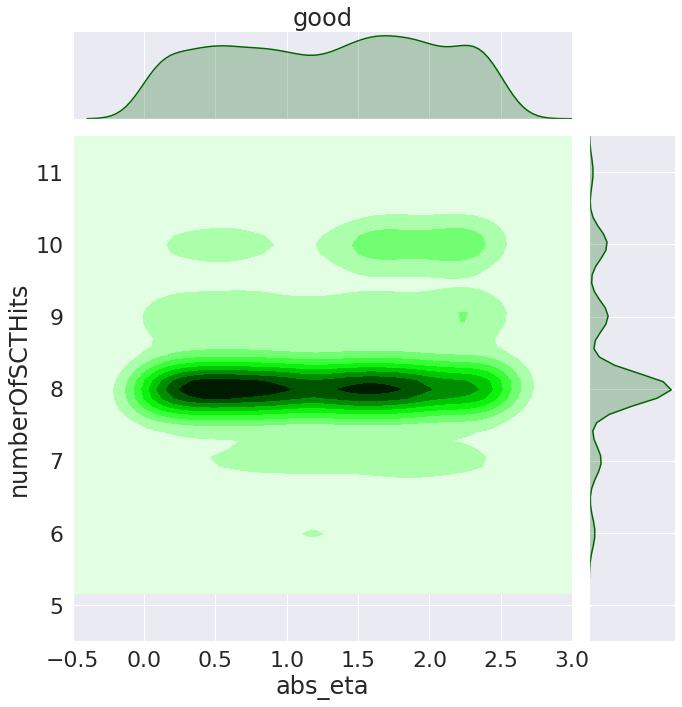

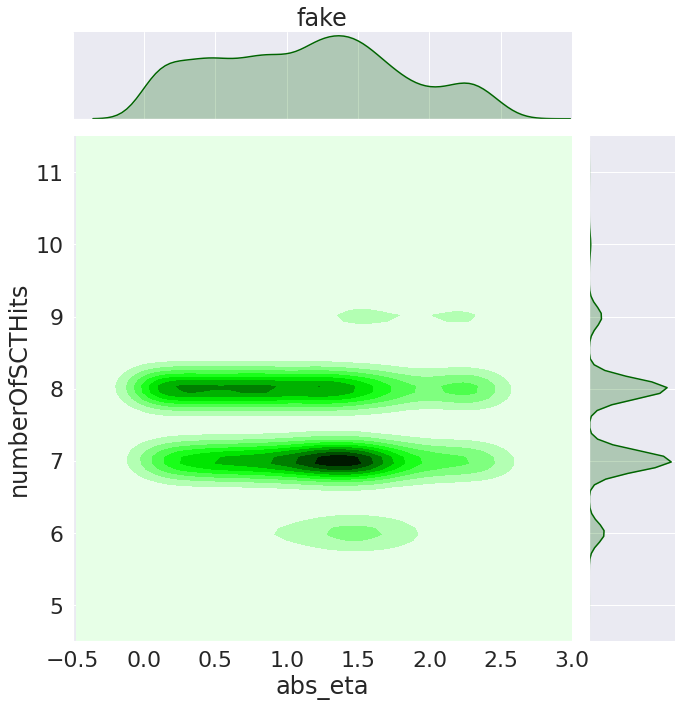

In [20]:
plot_kde_2d('abs_eta', 'numberOfSCTHits', nentries=5000, xlim=[-.5,3], ylim=[4.5,11.5])

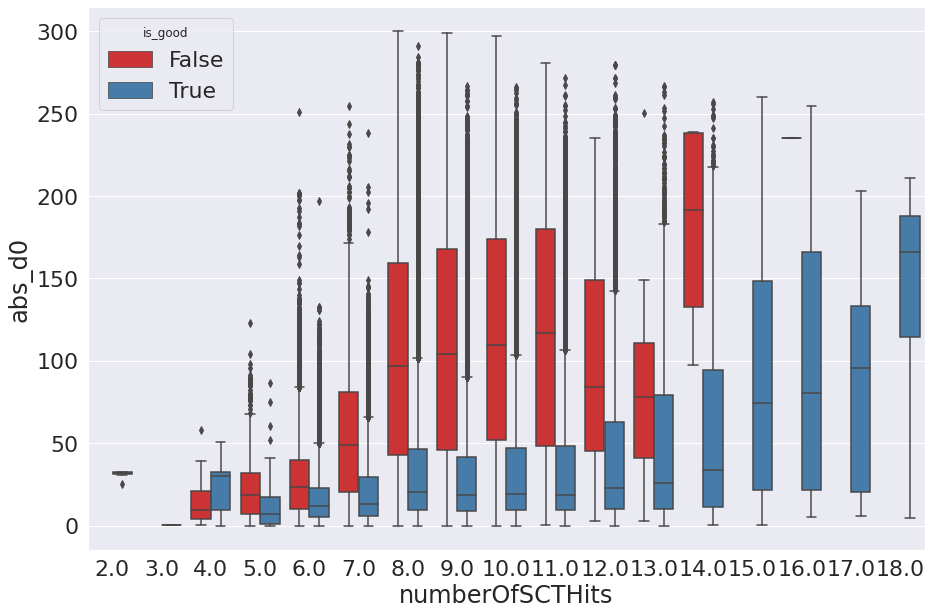

In [22]:
fig = plt.figure(figsize=[15,10])
ax = sns.boxplot(x='numberOfSCTHits', y='abs_d0', hue='is_good', data=df[0:-1], palette="Set1")

In [85]:
def plot2d(df, var_a, var_b, nentries=1000, bins=[10,10], title='', norm=None):
    fig = plt.figure(figsize=[15,10])
    h, xedges, yedges, image = plt.hist2d(x=df[0:nentries][var_a], y=df[0:nentries][var_b], bins=bins, norm=norm)
    plt.colorbar(image)
    ax = fig.gca()
    ax.set_xlabel(var_a, fontsize=30)
    ax.set_ylabel(var_b, fontsize=30)
    ax.set_title(title, fontsize=30)

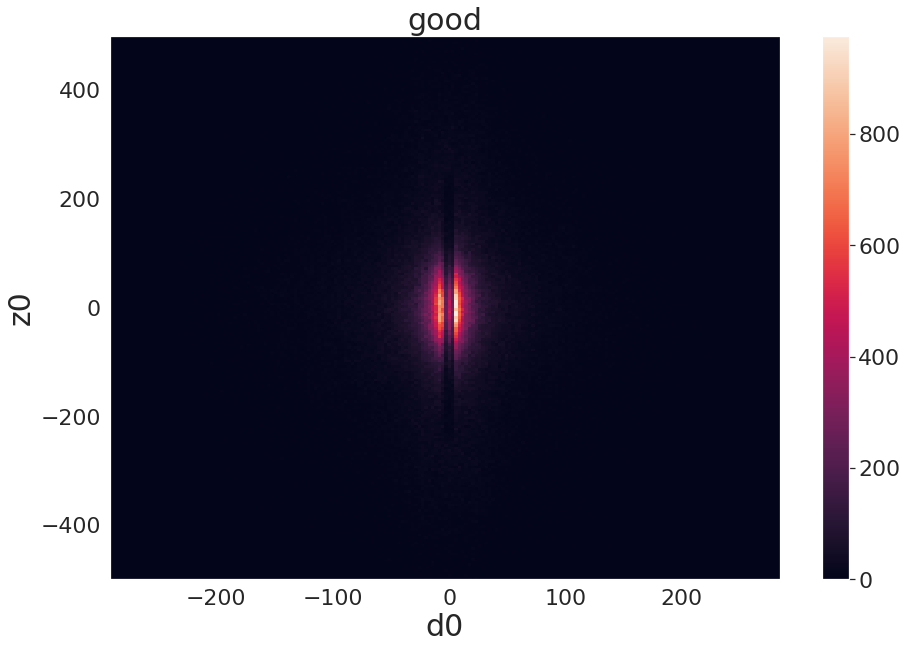

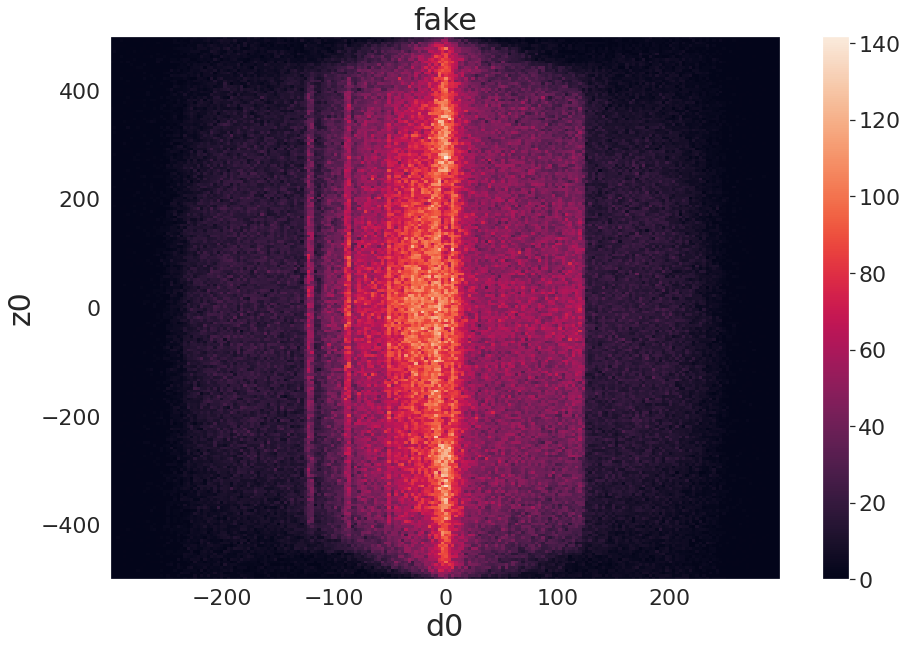

In [24]:
plot2d(good, 'd0', 'z0', -1, [200,200], 'good')
plot2d(fake, 'd0', 'z0', -1, [200,200], 'fake')

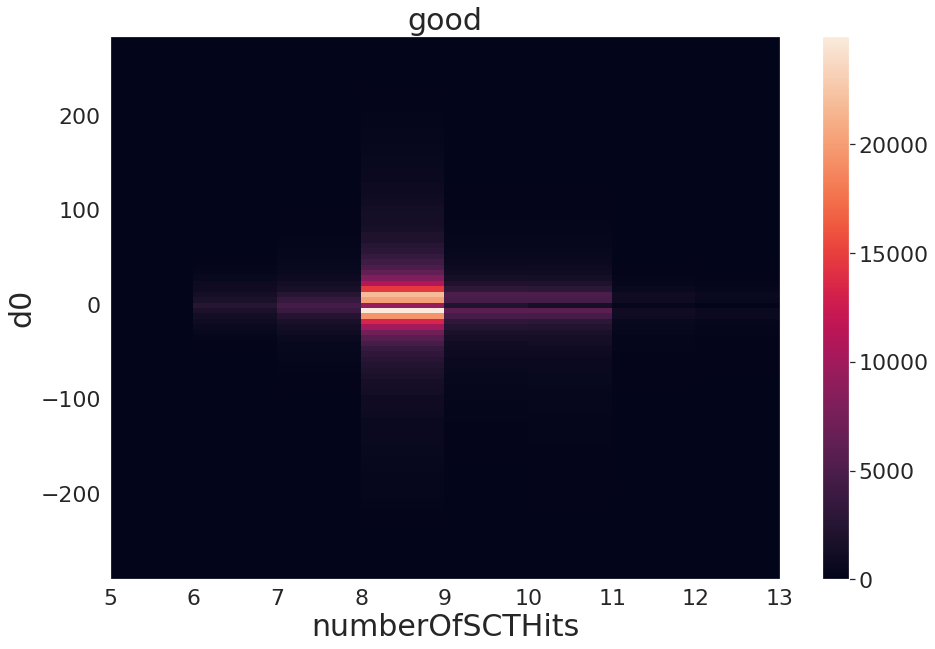

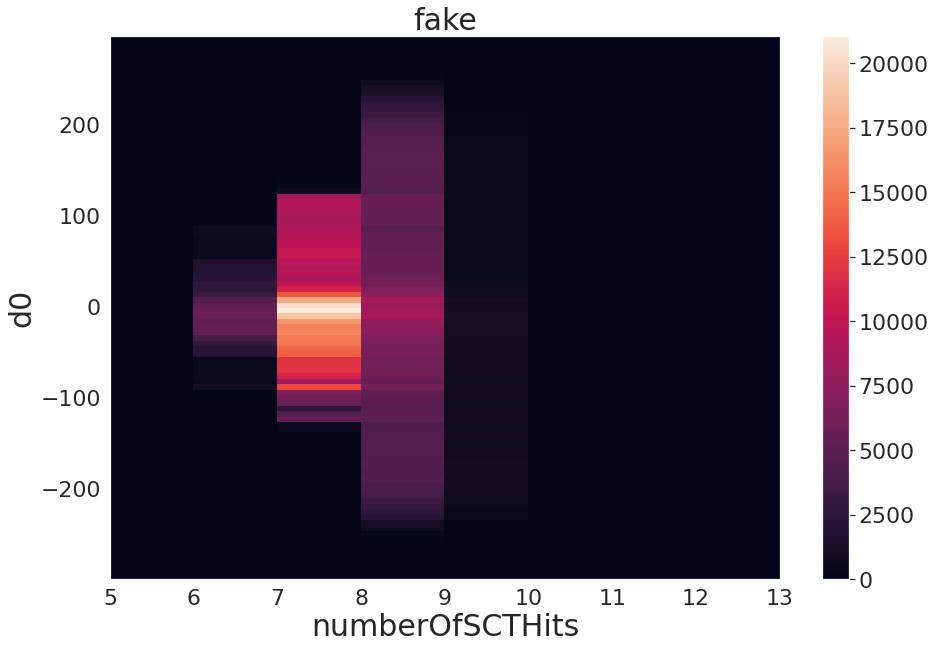

In [25]:
plot2d(good, 'numberOfSCTHits', 'd0', -1, [[5,6,7,8,9,10,11,12,13],100], 'good')
plot2d(fake, 'numberOfSCTHits', 'd0', -1, [[5,6,7,8,9,10,11,12,13],100], 'fake')

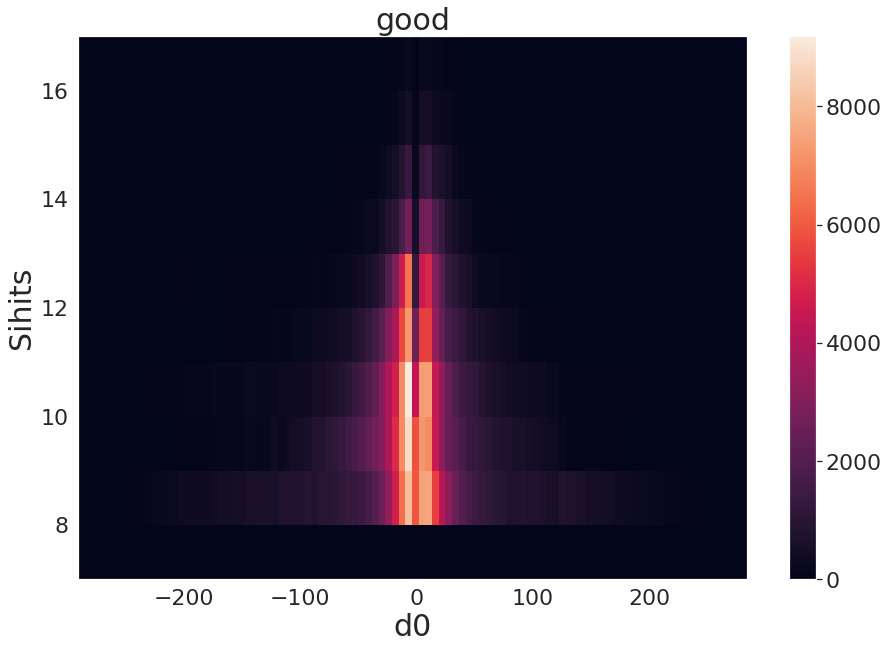

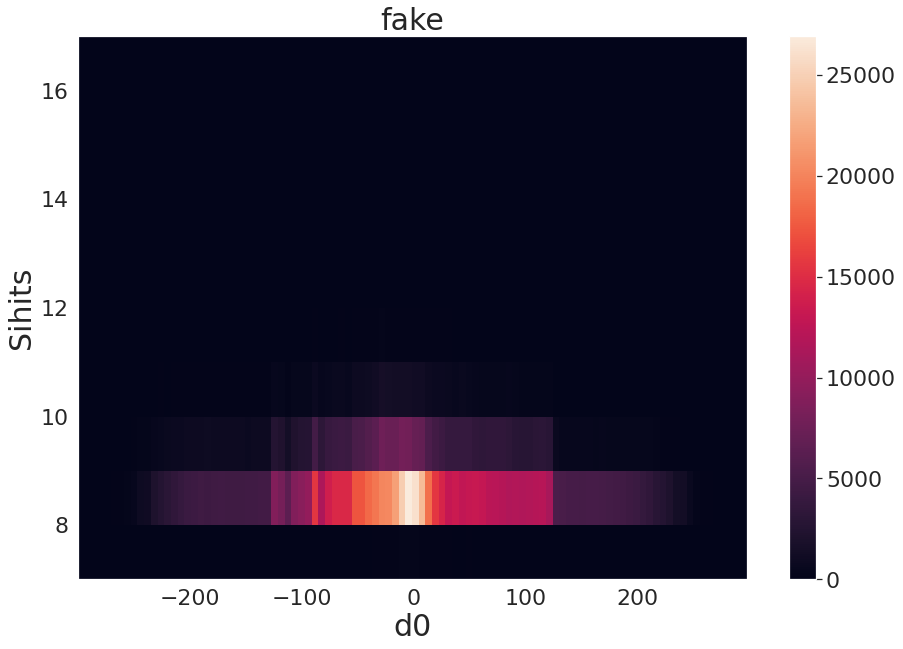

In [26]:
plot2d(good, 'd0', 'Sihits', -1, [100, np.arange(7,18)], 'good')
plot2d(fake, 'd0', 'Sihits', -1, [100, np.arange(7,18)], 'fake')

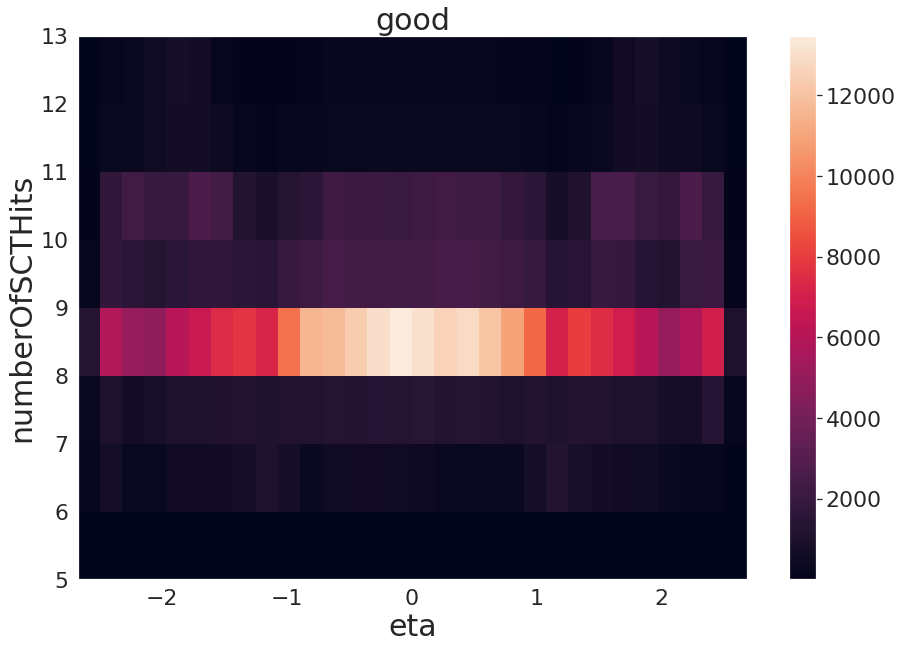

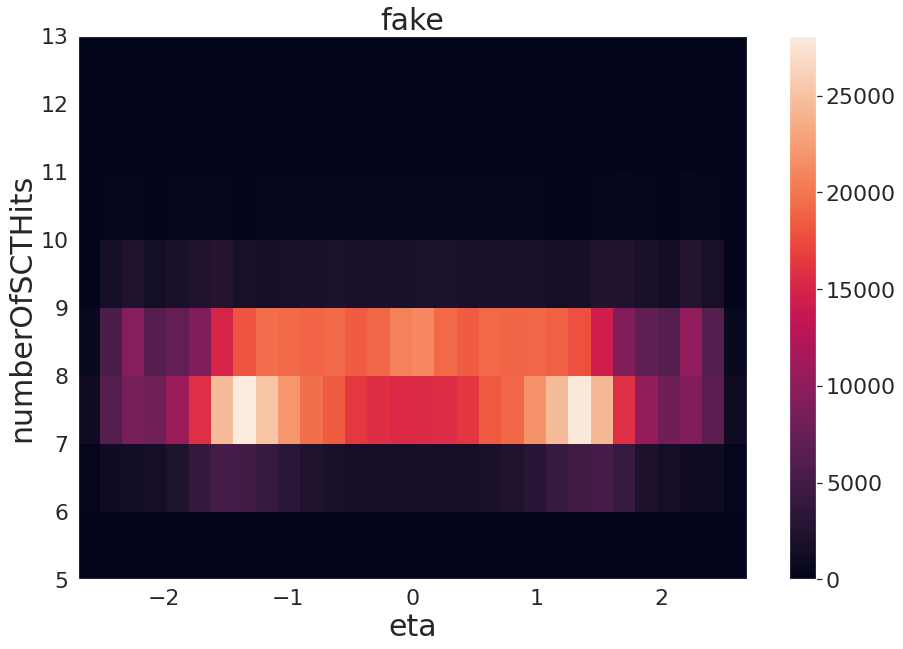

In [27]:
plot2d(good, 'eta', 'numberOfSCTHits', -1, [30, [5,6,7,8,9,10,11,12,13]], 'good')
plot2d(fake, 'eta', 'numberOfSCTHits', -1, [30, [5,6,7,8,9,10,11,12,13]], 'fake')

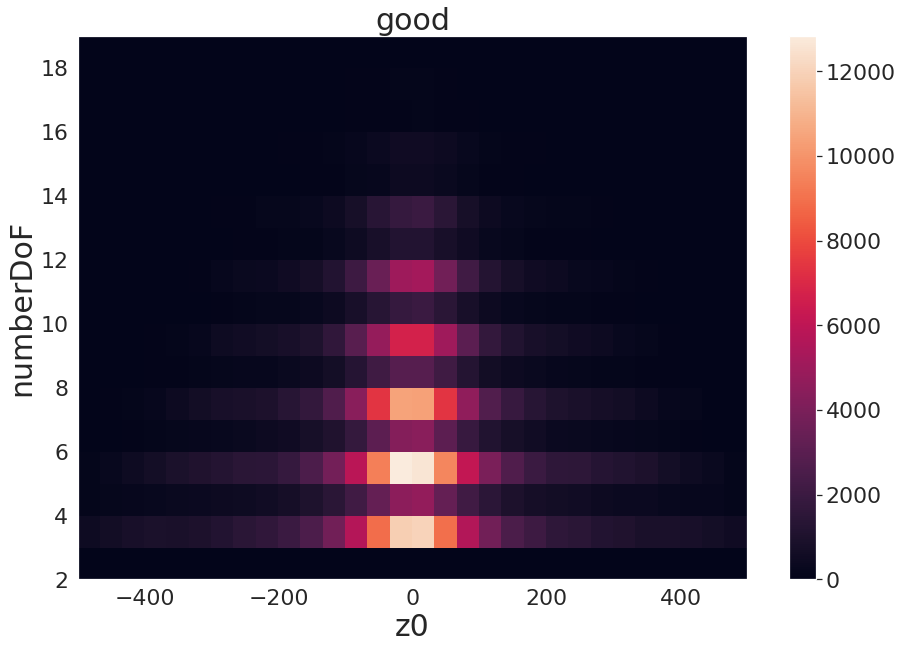

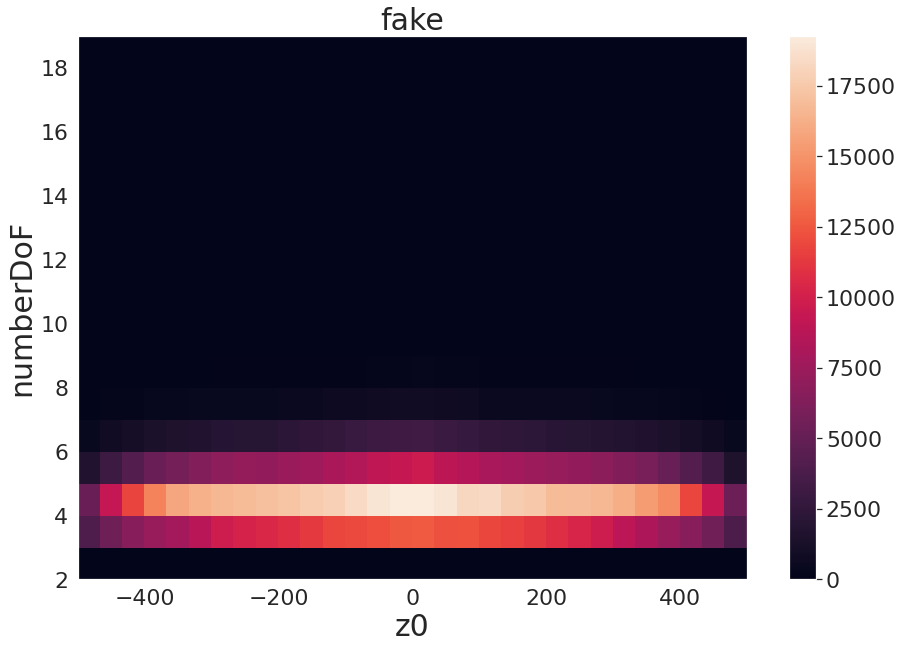

In [28]:
plot2d(good, 'z0', 'numberDoF', -1, [30, np.arange(2,20)], 'good')
plot2d(fake, 'z0', 'numberDoF', -1, [30, np.arange(2,20)], 'fake')

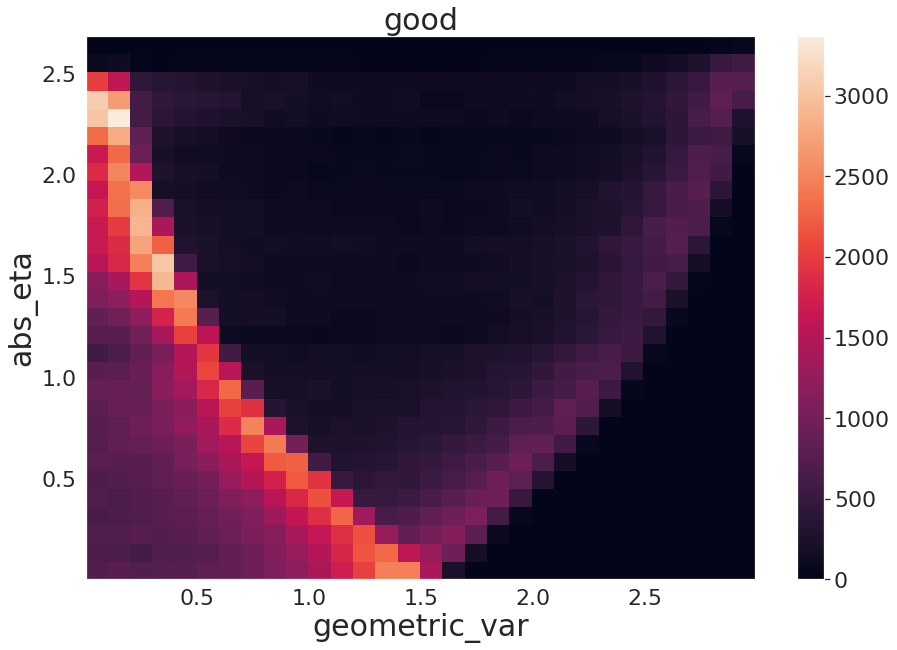

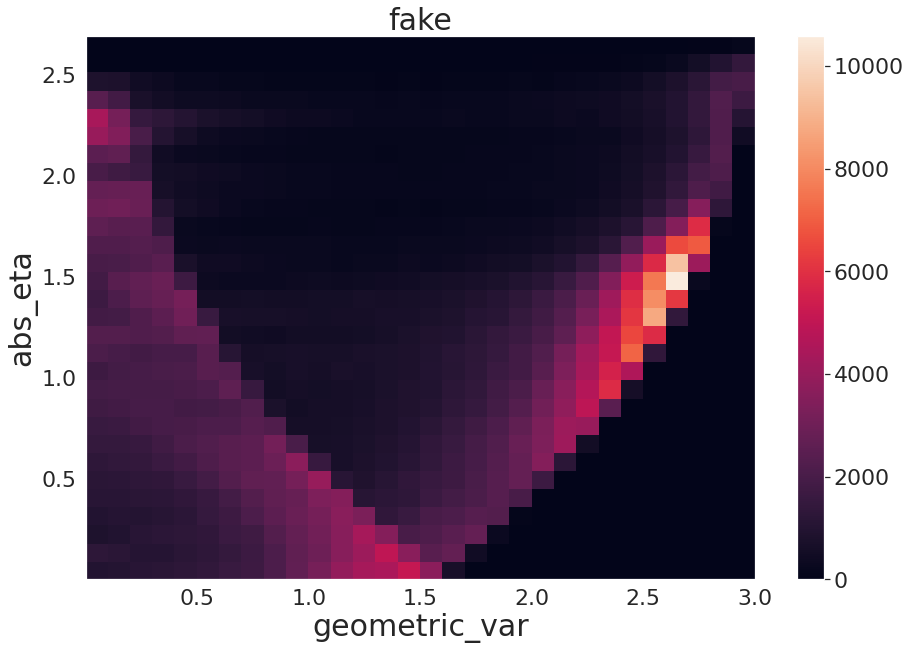

In [29]:
plot2d(good, 'geometric_var', 'abs_eta', -1, [30, 30], 'good')
plot2d(fake, 'geometric_var', 'abs_eta', -1, [30, 30], 'fake')

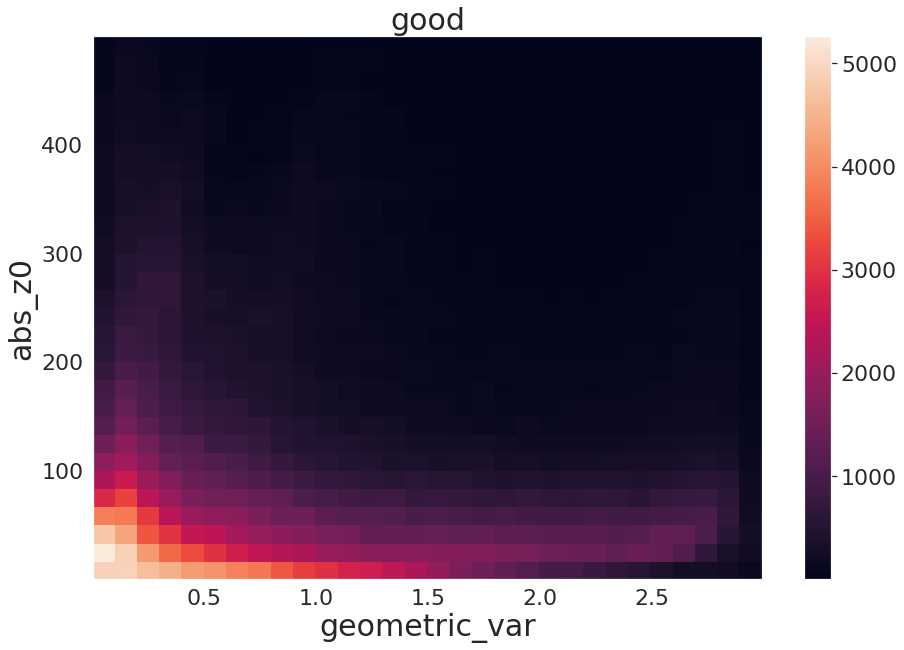

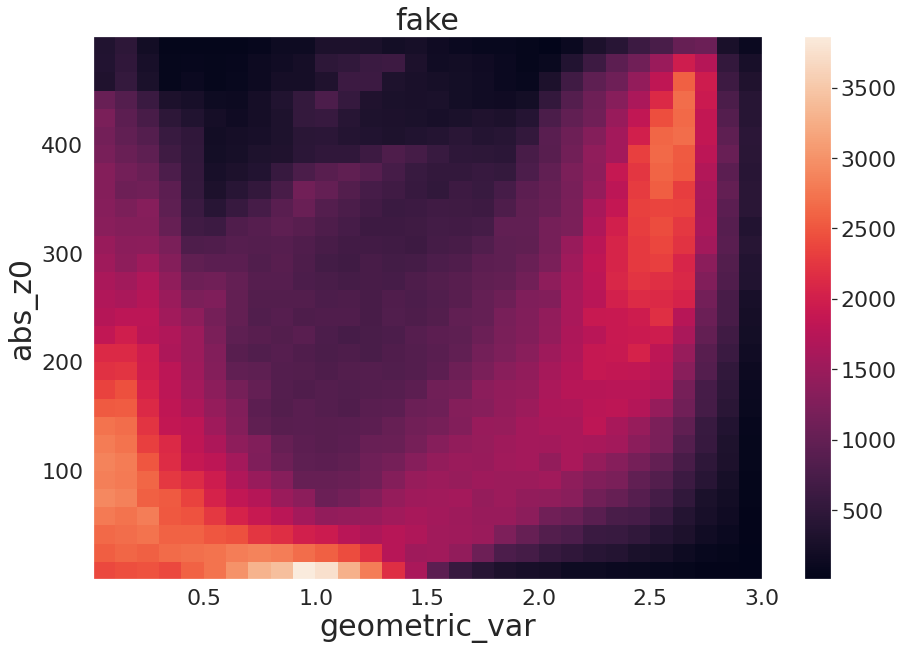

In [34]:
plot2d(good, 'geometric_var', 'abs_z0', -1, [30, 30], 'good')
plot2d(fake, 'geometric_var', 'abs_z0', -1, [30, 30], 'fake')

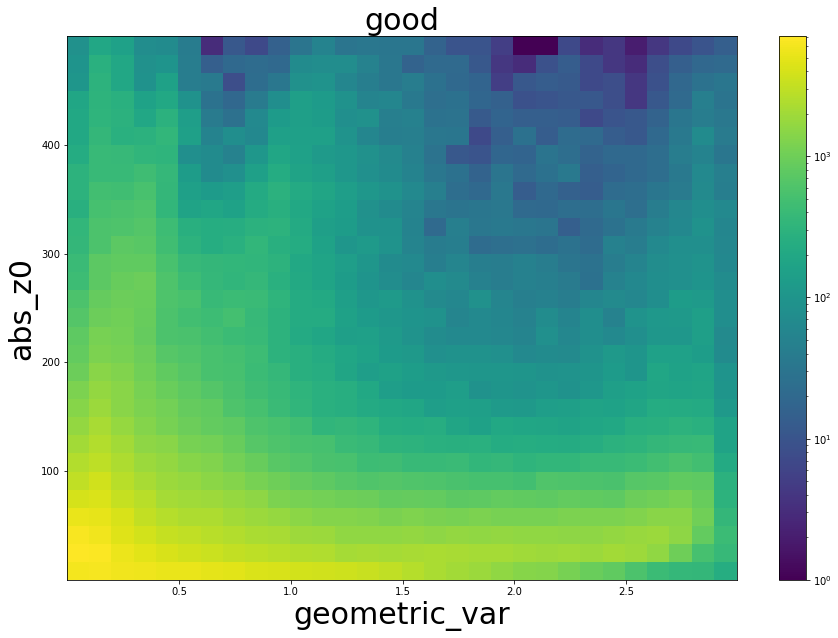

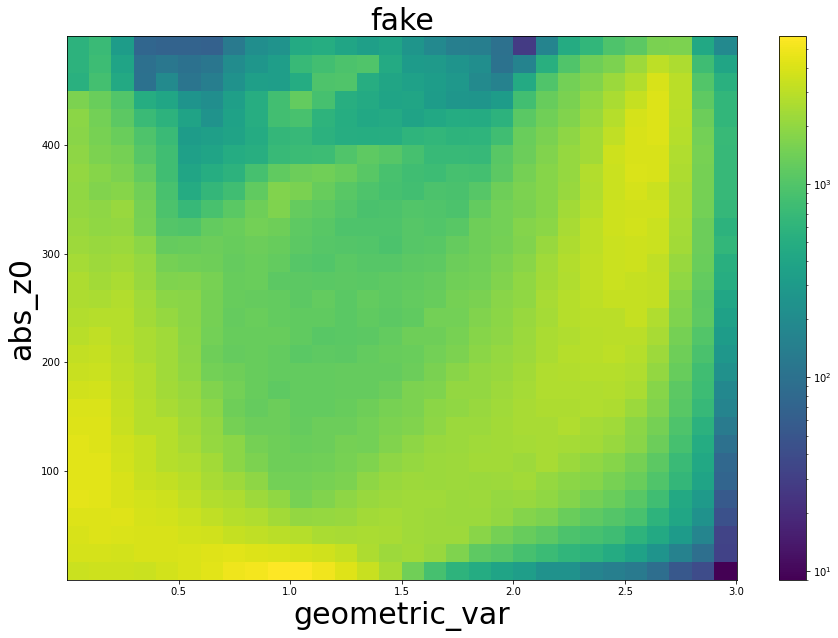

In [88]:
import matplotlib
plot2d(good, 'geometric_var', 'abs_z0', -1, [30, 30], 'good', norm=matplotlib.colors.LogNorm())
plot2d(fake, 'geometric_var', 'abs_z0', -1, [30, 30], 'fake', norm=matplotlib.colors.LogNorm())

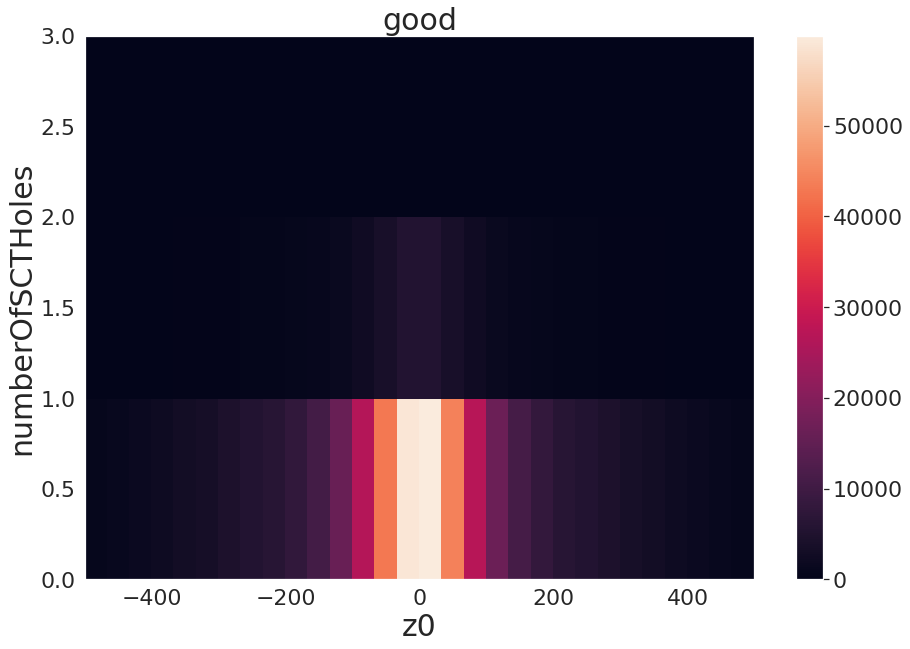

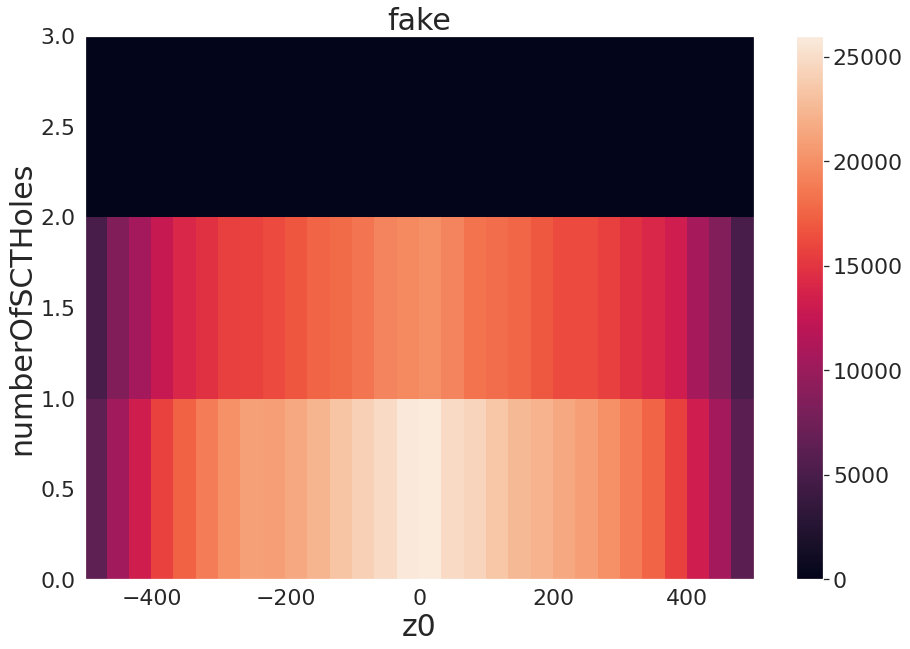

In [35]:
plot2d(good, 'z0', 'numberOfSCTHoles', -1, [30, [0,1,2,3]], 'good')
plot2d(fake, 'z0', 'numberOfSCTHoles', -1, [30, [0,1,2,3]], 'fake')


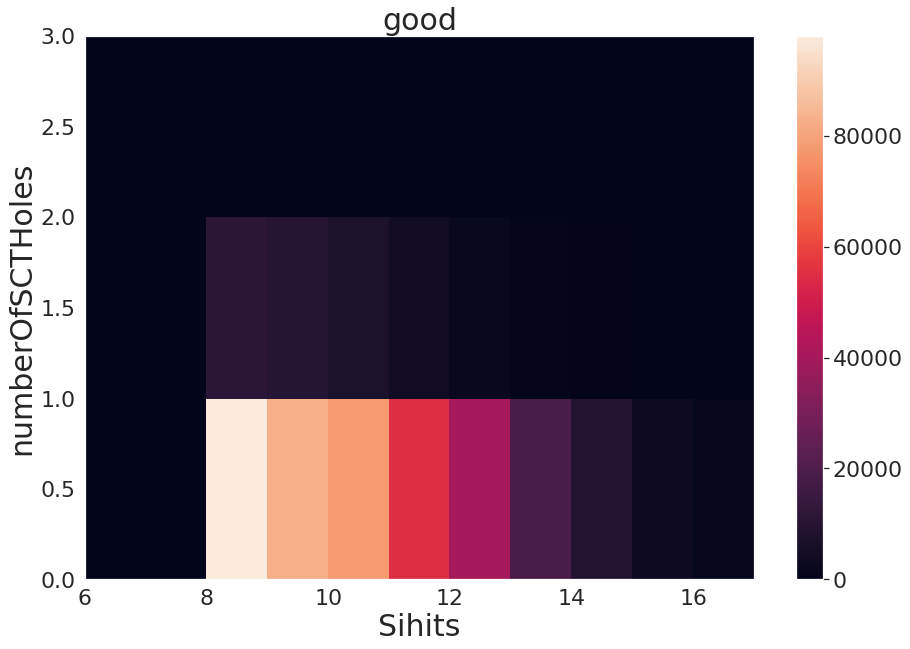

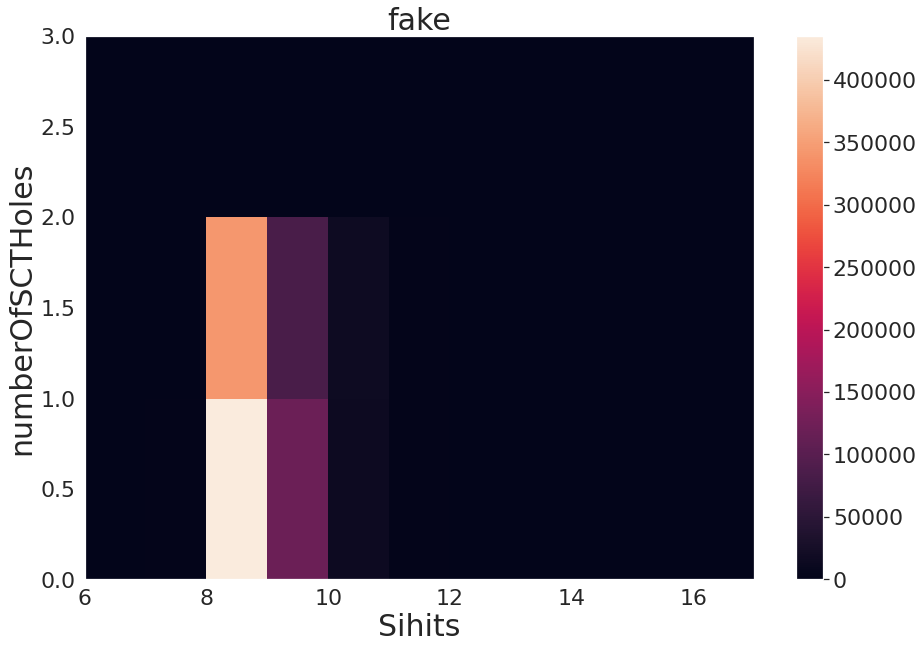

In [36]:
plot2d(good, 'Sihits', 'numberOfSCTHoles', -1, [np.arange(6,18), np.arange(0,4)], 'good')
plot2d(fake, 'Sihits', 'numberOfSCTHoles', -1, [np.arange(6,18), np.arange(0,4)], 'fake')


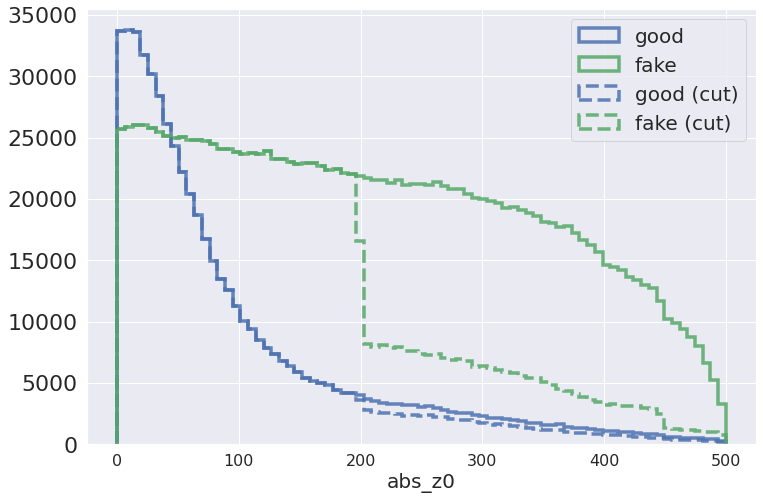

In [ ]:
def test_cut(x, cut_query, bins=np.linspace(0,1,11), leg_loc='upper left', log=False):
    plot_options = {
        'histtype' : 'step',
        'linewidth' : 3.5, 
        'alpha' : 0.85, 
        'density' : None,
        'bins' : bins,
        'log' : log
    }

    good_query = 'truthProbability >= 0.5 & linkValid == True'
    fake_query = 'truthProbability < 0.5 | linkValid == False'
    # Create slices for convenience
    good = df.query(good_query)
    fake = df.query(fake_query)
    # apply cut
    new_good = good.query(cut_query)
    new_fake = fake.query(cut_query)

    good_vals = ax.hist(good[x], edgecolor='#4C72B0', **plot_options)
    fake_vals = ax.hist(fake[x], edgecolor='#55A868', **plot_options)
    good_vals = ax.hist(new_good[x], edgecolor='#4C72B0', linestyle='--', **plot_options)
    fake_vals = ax.hist(new_fake[x], edgecolor='#55A868', linestyle='--',  **plot_options)
    ax.legend(['good', 'fake', 'good (cut)', 'fake (cut)'], loc=leg_loc, fontsize=20)
    ax.set_xlabel(x, fontsize = 20)
    ax.tick_params(axis='x', which='major', labelsize=16)
    return ax

cut_query = 'abs_z0 < 200 | geometric_var < 1'
fig, ax = plt.subplots(1, 1,figsize=(12,8))
test_cut('abs_z0', cut_query, bins=np.linspace(0,500,80), leg_loc='upper right')
fig, ax = plt.subplots(1, 1,figsize=(12,8))
test_cut('abs_d0', cut_query, bins=np.linspace(0,250,80), leg_loc='upper right')
fig, ax = plt.subplots(1, 1,figsize=(12,8))
test_cut('track_pt', cut_query, bins=np.linspace(0,1e5,80), leg_loc='upper right', log=True)
fig, ax = plt.subplots(1, 1,figsize=(12,8))
test_cut('truthProbability', cut_query, bins=np.linspace(0,1,11), leg_loc='upper left')